# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1: Dor 8402

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [3]:
# Load datasets
train_df = pd.read_csv('titanic_train.csv')
test_df = pd.read_csv('titanic_test.csv')

In [4]:
# Show first 5 rows
print(train_df.head())

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0       1    0  54.0      1      0  78.2667         1         1
1       2    0  45.0      0      0  13.5000         0         1
2       3    1  20.0      0      0   9.5000         0         0
3       3    1  36.0      0      0   7.8958         0         0
4       3    1  22.0      0      0   8.0500         0         0


In [5]:
print(test_df.head())

   Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
0       3    1  35.000000      0      0   7.0500         0         0
1       3    1  30.000000      0      0   7.2500         0         0
2       3    1  29.699118      0      0  14.5000         0         0
3       3    0  21.000000      0      0   7.7500         2         0
4       3    1  32.000000      0      0  56.4958         0         1


# EDA

In [6]:
# Descriptive statistics
print(train_df.describe())

           Pclass         Sex         Age       SibSp       Parch        Fare  \
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000   
mean     2.294944    0.640449   29.531213    0.528090    0.384831   32.379429   
std      0.841990    0.480206   13.188028    1.055052    0.803085   49.836074   
min      1.000000    0.000000    0.670000    0.000000    0.000000    0.000000   
25%      1.750000    0.000000   22.000000    0.000000    0.000000    7.925000   
50%      3.000000    1.000000   29.699118    0.000000    0.000000   14.500000   
75%      3.000000    1.000000   35.000000    1.000000    0.000000   31.275000   
max      3.000000    1.000000   80.000000    8.000000    6.000000  512.329200   

         Embarked    Survived  
count  712.000000  712.000000  
mean     0.372191    0.394663  
std      0.649970    0.489122  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    1.000000  
max      3.000

# Survival countplot

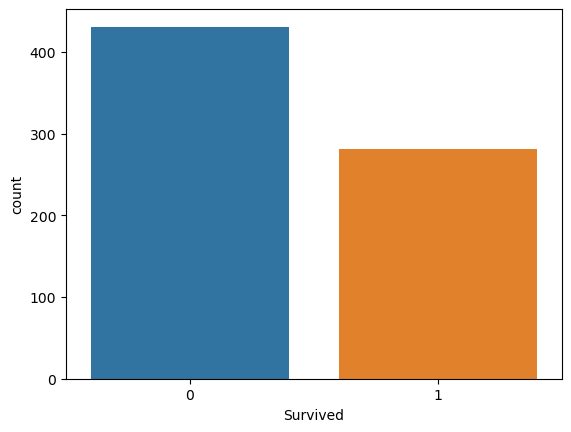

In [7]:
sns.countplot(x='Survived', data=train_df)
plt.show()

# Survival rate by gender

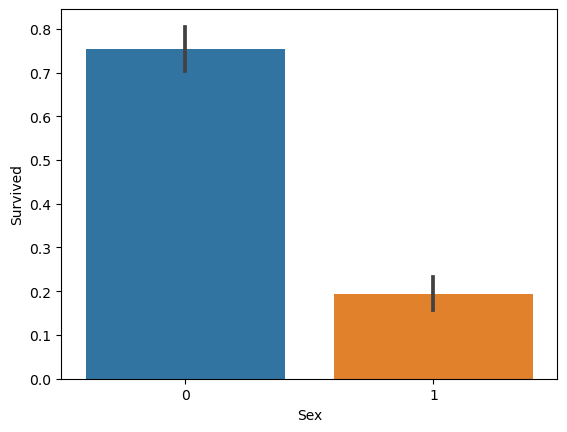

In [8]:
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.show()

# Distribution of Age

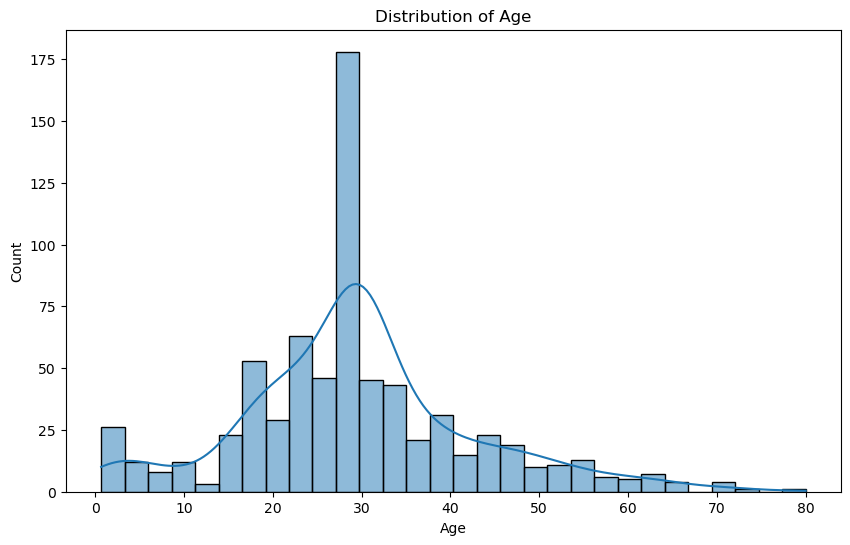

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Age'].dropna(), kde=True, bins=30)
plt.title('Distribution of Age')
plt.show()

# Survival by Passenger Class

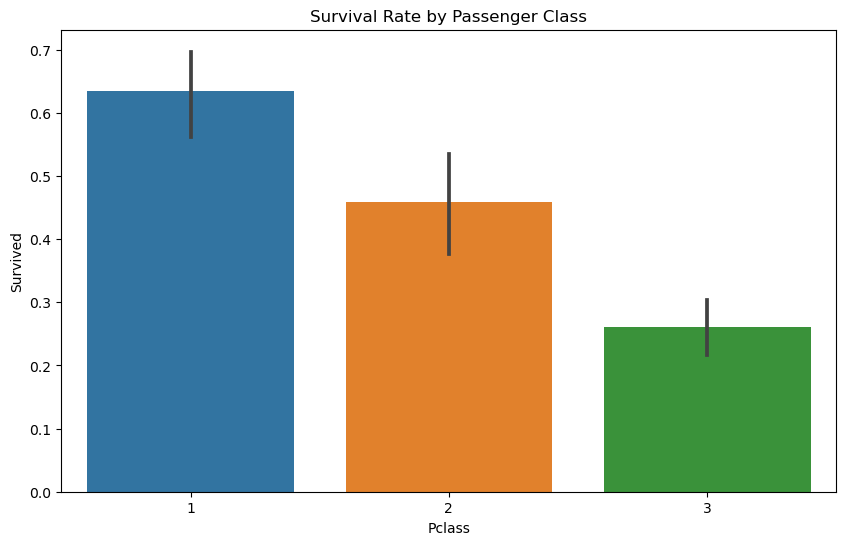

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Survival Rate by Passenger Class')
plt.show()

# Correlation Heatmap

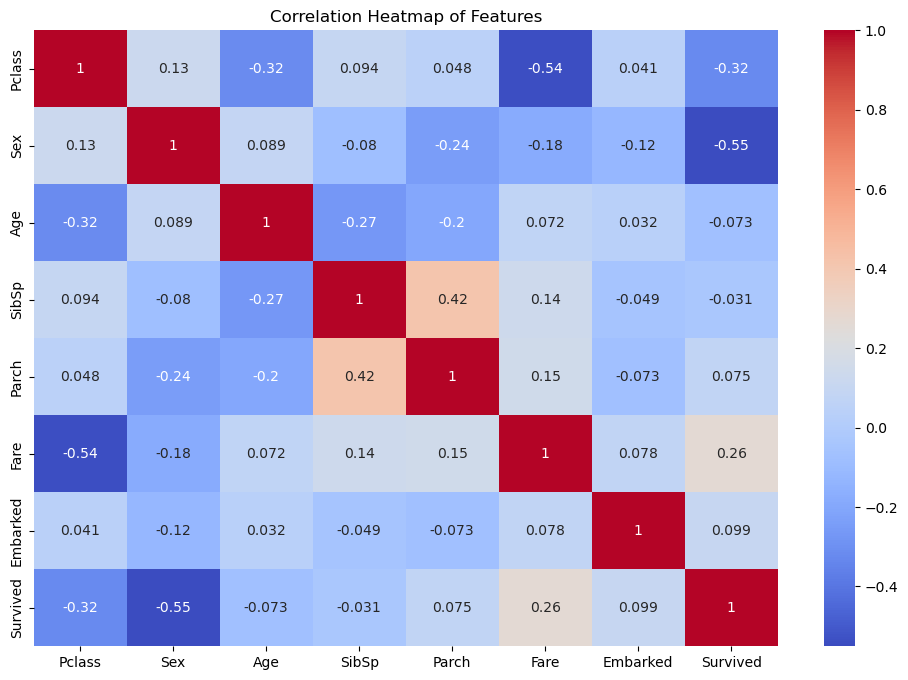

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

# Fare distribution by survival

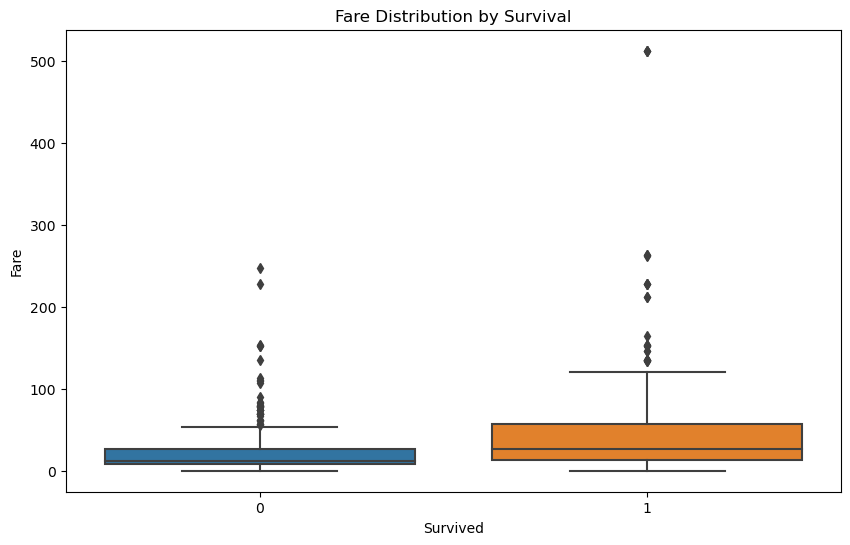

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=train_df)
plt.title('Fare Distribution by Survival')
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [13]:
# Feature engineering pipeline
numeric_features = ['Age', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_features = ['Pclass', 'Sex', 'Embarked']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Model pipelines
models = {
    'logistic_regression': Pipeline(steps=[('preprocessor', preprocessor),
                                           ('classifier', LogisticRegression())]),
    'random_forest': Pipeline(steps=[('preprocessor', preprocessor),
                                     ('classifier', RandomForestClassifier())])
}

In [14]:
# Hyperparameters
param_grid_lr = {'classifier__C': [0.1, 1, 10]}
param_grid_rf = {'classifier__n_estimators': [50, 100, 200]}

# Cross-validation for Logistic Regression
grid_lr = GridSearchCV(models['logistic_regression'], param_grid_lr, cv=5, scoring='f1')
grid_lr.fit(train_df.drop(columns='Survived'), train_df['Survived'])

# Cross-validation for Random Forest
grid_rf = GridSearchCV(models['random_forest'], param_grid_rf, cv=5, scoring='f1')
grid_rf.fit(train_df.drop(columns='Survived'), train_df['Survived'])

# Create DataFrame for Logistic Regression results
cv_results_lr = pd.DataFrame(grid_lr.cv_results_)[['params', 'mean_test_score']]
cv_results_lr['Model'] = 'Logistic Regression'

# Create DataFrame for Random Forest results
cv_results_rf = pd.DataFrame(grid_rf.cv_results_)[['params', 'mean_test_score']]
cv_results_rf['Model'] = 'Random Forest'

# Concatenate both results into a single summary DataFrame
summary_results = pd.concat([cv_results_lr, cv_results_rf], ignore_index=True)

# Display the summary table with Model, Hyperparameters, and Mean Test F1 Score
print("Summary of Cross-Validation Results:")
summary_results

Summary of Cross-Validation Results:


,params,mean_test_score,Model
0,{'classifier__C': 0.1},0.737440,Logistic Regression
1,{'classifier__C': 1},0.739707,Logistic Regression
2,{'classifier__C': 10},0.738519,Logistic Regression
3,{'classifier__n_estimators': 50},0.740140,Random Forest
4,{'classifier__n_estimators': 100},0.741401,Random Forest
5,{'classifier__n_estimators': 200},0.741423,Random Forest


In [15]:
# Display best results
best_params_lr = grid_lr.best_params_
best_score_lr = grid_lr.best_score_

best_params_rf = grid_rf.best_params_
best_score_rf = grid_rf.best_score_

print(f"Best Logistic Regression: {best_params_lr}, F1-score: {best_score_lr}")
print(f"Best Random Forest: {best_params_rf}, F1-score: {best_score_rf}")

Best Logistic Regression: {'classifier__C': 1}, F1-score: 0.7397072616347421
Best Random Forest: {'classifier__n_estimators': 200}, F1-score: 0.7414226529125684


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [16]:
# Retraining the best model
best_model = grid_rf.best_estimator_ 
best_model.fit(train_df.drop(columns='Survived'), train_df['Survived'])

# Predictions on train data
train_predictions = best_model.predict(train_df.drop(columns='Survived'))

# Calculate F1-Score on train data
f1_train = f1_score(train_df['Survived'], train_predictions)
print(f'F1 Score on train data (Best Model): {f1_train}')

F1 Score on train data (Best Model): 0.9730700179533215


## Part 5 - Apply on test and show model performance estimation

In [17]:
# Predict on the test set
test_predictions = best_model.predict(test_df)

# Add predictions to the test DataFrame
test_df['Survived_Predicted'] = test_predictions
f1_test = f1_score(test_df['Survived'], test_predictions)
print(f'F1 Score on test data: {f1_test}')
# Show the first 5 rows of the test DataFrame with predictions
print(test_df.head())

F1 Score on test data: 0.7833333333333333
   Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived  \
0       3    1  35.000000      0      0   7.0500         0         0   
1       3    1  30.000000      0      0   7.2500         0         0   
2       3    1  29.699118      0      0  14.5000         0         0   
3       3    0  21.000000      0      0   7.7500         2         0   
4       3    1  32.000000      0      0  56.4958         0         1   

   Survived_Predicted  
0                   0  
1                   0  
2                   0  
3                   1  
4                   1  
